## Importing Dependencies

In [1]:
## For some arithmetic and Matrix Operations
import numpy as np

## Dataframe Manipulation
import pandas as pd

## For Visualization
import matplotlib.pyplot as plt

## For Visualization too
import seaborn as sns

## Creating Pipeline
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline


## Creating a function transformer
from sklearn.preprocessing import FunctionTransformer

## For Column Transformer
from sklearn.compose import ColumnTransformer
from sklearn.compose import make_column_selector


## For preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

## For missing values
from sklearn.impute import SimpleImputer

## Getting the recall score on our train set
from sklearn.metrics import recall_score

## Getting the accuracy score on train set
from sklearn.metrics import accuracy_score

## Getting the classification report from our train set
from sklearn.metrics import classification_report

## Cross validation
from sklearn.model_selection import cross_val_score

## Gridsearch CV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

## Imbalanced pipeline and SMOTE
from imblearn.pipeline import Pipeline, make_pipeline
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks

## Models
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from xgboost import XGBClassifier


C:\Users\heman\AppData\Local\Temp\ipykernel_12440\2597588080.py:5: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


## Creating Functions

In [2]:
## printing the shape and head
def head(df,shape_only=False):
    print(df.shape)

    if shape_only:
        return
    else:
        return df.head()

## for EDA of categorical values
def eda_bivariate_categorical(df,column,target):

    fig,ax = plt.subplots(figsize = (9,8))

    color = 'Set2'

    palette_color = sns.color_palette(color)

    ax = sns.countplot(x = column, data=df, hue=target,palette=color,order = df[column].value_counts().index)
    ax.set_ylabel('Count')

    offset = df[column].value_counts().max() * 0.005

    list_bars = df.groupby([column,target])[column].agg(['count']).unstack().fillna(0).values

    patches = ax.patches
    bars_pos = 0

    for i in range(df[target].nunique()):
        for j in range(df[column].nunique()):
            list_bars_col = list_bars[j] 
            total_sum = list_bars_col.sum()
            value = list_bars_col[i]

            percentage = value / total_sum

            if percentage == 0:
                bars_pos += 1
                continue
            else:
                x = patches[bars_pos].get_x() + patches[j].get_width()/2
                y = patches[bars_pos].get_height() + offset
                ax.annotate('{:.1f}%'.format(percentage*100), (x, y), ha='center')
                bars_pos += 1
    plt.show()

## Function that plots numerical variables into histogram and violin plot
def eda_bivariate_numerical(data,column,target,color,
                    figsize=(12,6),
                    # save=True,
                    val=0,
                    target_type = 'Numerical'):

    fig, axes = plt.subplots(1, 2, figsize=figsize)
    cmap = sns.color_palette(color)
    val = val

    for i in range(1):
        for j in range(2):
            if j==0:
                    sns.histplot(data = data,x=data[column],hue=target,
                                bins=50,kde=True,palette=color,ax=axes[j])
                    axes[j].set(xlabel=None)
                    axes[j].grid(False)
            elif j==1:
                sns.boxplot(data = data,x=data[column],y = target, ax=axes[j], palette=color,orient='h',
                )
                axes[j].set(xlabel=None)
                axes[j].grid(False)
                val += 1
                plt.tight_layout()
            if target_type == 'Numerical':
                plt.suptitle(column)
            else:
                plt.suptitle(f'{column} vs. {target}')
    plt.show()
    
    # path = 'Figures\\Numerical\\'
    # if save:
    #     plt.savefig(f"{path}{column}.pdf",dpi=1000)


## print text to see the font
def print_text(text):
    fig, ax = plt.subplots(figsize=(6, 1), facecolor="#eefade")
    ax.text(0.5, 0.5, text, ha='center', va='center', size=40)
    ax.axis("off")
    plt.show()


## Reading Dataset and Showing its Description

In [3]:
df = pd.read_csv('CVD_cleaned.csv')

## Viewing the dataframe and shape
head(df,shape_only=False) 

(308854, 19)


,General_Health,Checkup,Exercise,Heart_Disease,Skin_Cancer,Other_Cancer,Depression,Diabetes,Arthritis,Sex,Age_Category,Height_(cm),Weight_(kg),BMI,Smoking_History,Alcohol_Consumption,Fruit_Consumption,Green_Vegetables_Consumption,FriedPotato_Consumption
0,Poor,Within the past 2 years,No,No,No,No,No,No,Yes,Female,70-74,150.0,32.66,14.54,Yes,0.0,30.0,16.0,12.0
1,Very Good,Within the past year,No,Yes,No,No,No,Yes,No,Female,70-74,165.0,77.11,28.29,No,0.0,30.0,0.0,4.0
2,Very Good,Within the past year,Yes,No,No,No,No,Yes,No,Female,60-64,163.0,88.45,33.47,No,4.0,12.0,3.0,16.0
3,Poor,Within the past year,Yes,Yes,No,No,No,Yes,No,Male,75-79,180.0,93.44,28.73,No,0.0,30.0,30.0,8.0
4,Good,Within the past year,No,No,No,No,No,No,No,Male,80+,191.0,88.45,24.37,Yes,0.0,8.0,4.0,0.0


In [4]:
## Setting the target variable
target = 'Heart_Disease'

In [5]:
## Creating numerical and categorical columns
numerical = df.select_dtypes(include=['float64']).columns.sort_values()
categorical = df.select_dtypes(include=['object']).columns.sort_values()

## Printing the length of numerical and categorical. The total length should have
## the same length as our dataframe
print(f'There are {len(categorical)} Categorical variables')
print(f'There are {len(numerical)} Numerical variables')

There are 12 Categorical variables
There are 7 Numerical variables


In [6]:
## Showing the columns in alphabetical order
df.columns.sort_values()

## Showing the descriptions of numerical variables
print('')
num_describe = df.describe().T
num_describe_table = num_describe.loc[:,['mean', 'std', '25%', '50%', '75%']]
print(num_describe_table)

## Showing the descriptions of categorical variables
print('')
object_describe_table = df.describe(include=object)
print(object_describe_table)
## print it to latex
# print(object_describe_table.to_latex())


                                    mean        std     25%     50%     75%
Height_(cm)                   170.615249  10.658026  163.00  170.00  178.00
Weight_(kg)                    83.588655  21.343210   68.04   81.65   95.25
BMI                            28.626211   6.522323   24.21   27.44   31.85
Alcohol_Consumption             5.096366   8.199763    0.00    1.00    6.00
Fruit_Consumption              29.835200  24.875735   12.00   30.00   30.00
Green_Vegetables_Consumption   15.110441  14.926238    4.00   12.00   20.00
FriedPotato_Consumption         6.296616   8.582954    2.00    4.00    8.00

       General_Health               Checkup Exercise Heart_Disease  \
count          308854                308854   308854        308854   
unique              5                     5        2             2   
top         Very Good  Within the past year      Yes            No   
freq           110395                239371   239381        283883   

       Skin_Cancer Other_Cancer Depress

## Exploratory Data Analysis (EDA)

### Target Variable

#### Categorical

C:\Users\heman\AppData\Local\Temp\ipykernel_12440\1969958747.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = target,


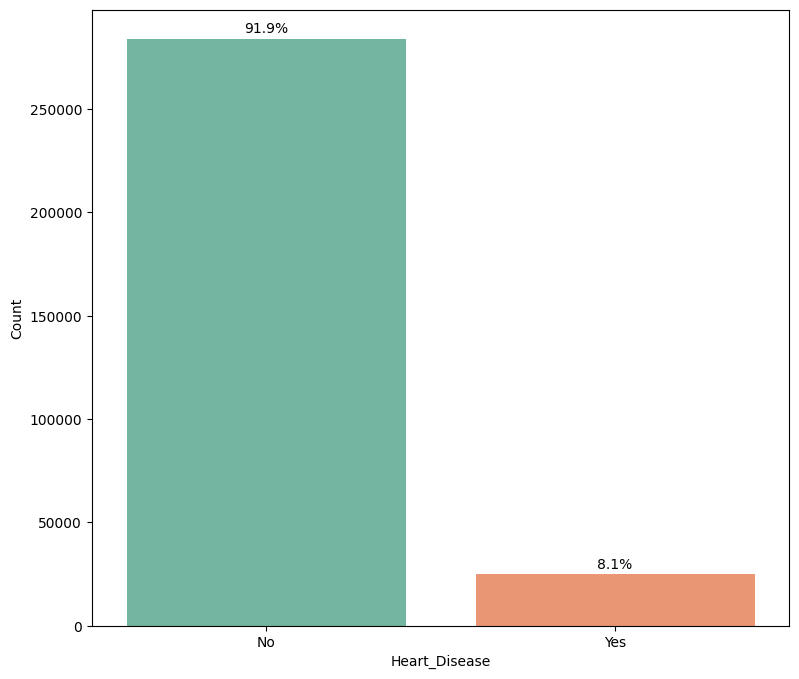

In [7]:
fig,ax = plt.subplots(figsize = (9,8))
color = 'Set2'
palette_color = sns.color_palette(color)

ax = sns.countplot(x = target, 
                data=df,
                palette=color,
                order = df[target].value_counts().index
                )
ax.set_ylabel('Count')

patches = ax.patches

for j in range(len(patches)):
        percentage = list(df[target].value_counts())[j]/df[target].value_counts().sum()
        offset = df[target].value_counts().max() * 0.01
        x = patches[j].get_x() + patches[j].get_width()/2
        y = patches[j].get_height() + offset
        ax.annotate('{:.1f}%'.format(percentage*100), (x, y), ha='center')

plt.show()
    

- We can deduct from this that the target variable is imbalanced

### Univariate Analysis

General_Health


C:\Users\heman\AppData\Local\Temp\ipykernel_12440\3674759050.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = i,


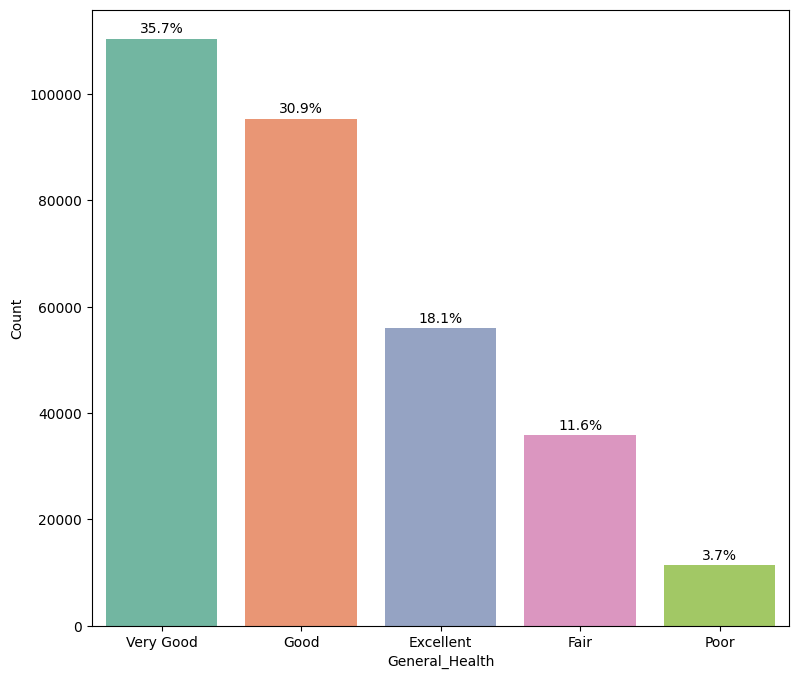

Checkup


C:\Users\heman\AppData\Local\Temp\ipykernel_12440\3674759050.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = i,


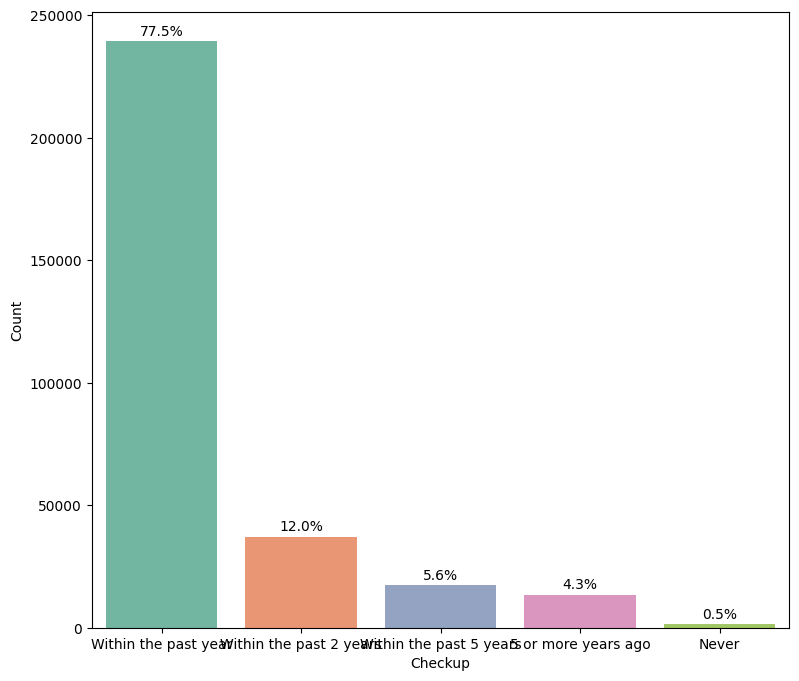

Exercise


C:\Users\heman\AppData\Local\Temp\ipykernel_12440\3674759050.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = i,


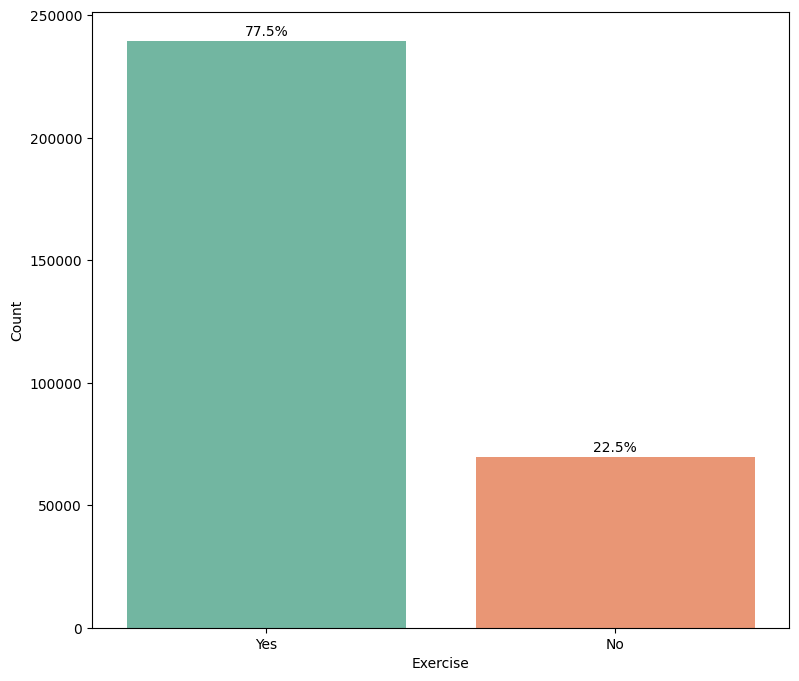

Skin_Cancer


C:\Users\heman\AppData\Local\Temp\ipykernel_12440\3674759050.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = i,


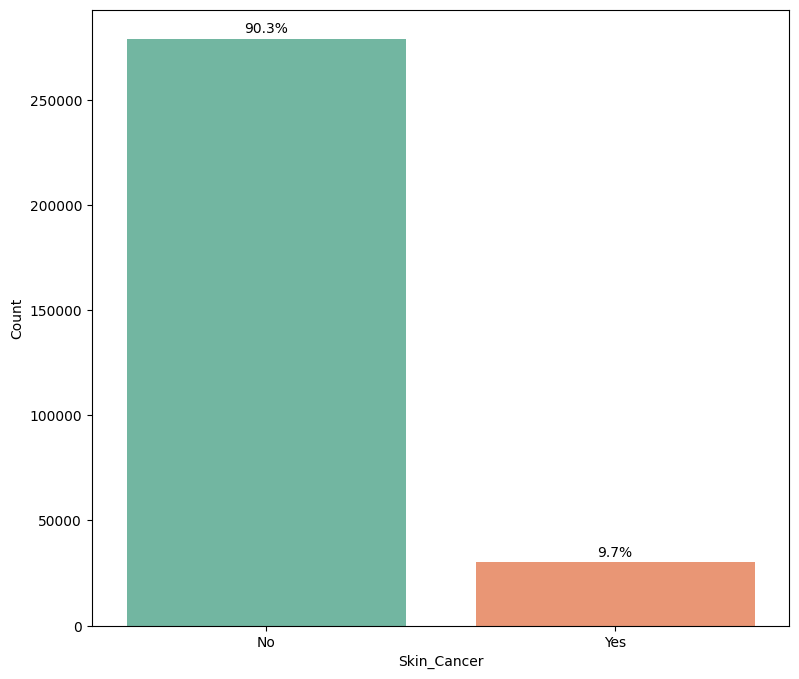

Other_Cancer


C:\Users\heman\AppData\Local\Temp\ipykernel_12440\3674759050.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = i,


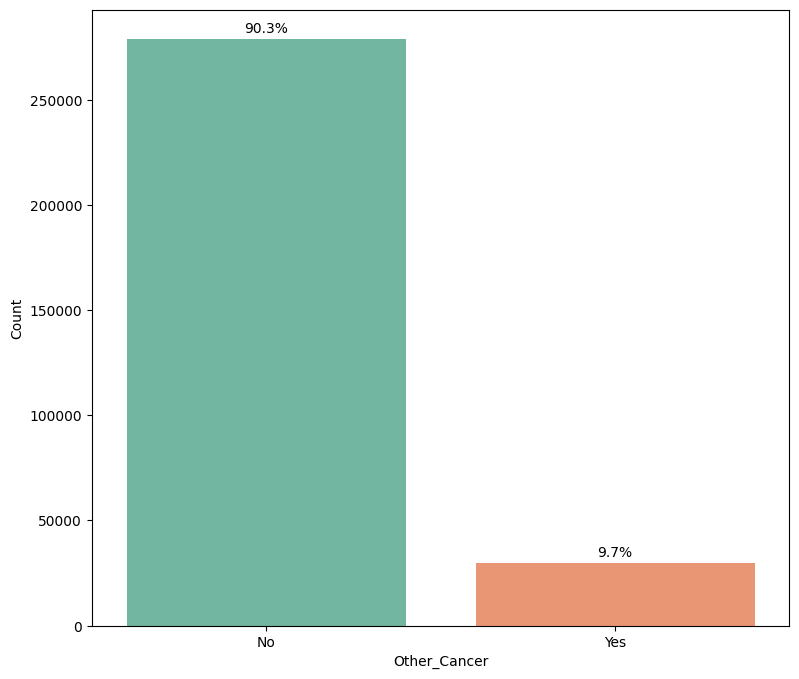

Depression


C:\Users\heman\AppData\Local\Temp\ipykernel_12440\3674759050.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = i,


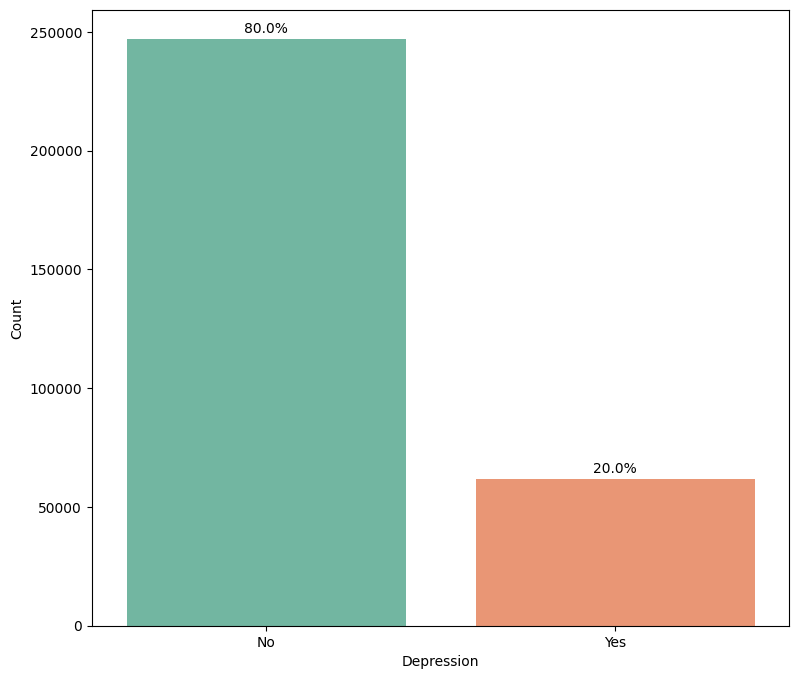

Diabetes


C:\Users\heman\AppData\Local\Temp\ipykernel_12440\3674759050.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = i,


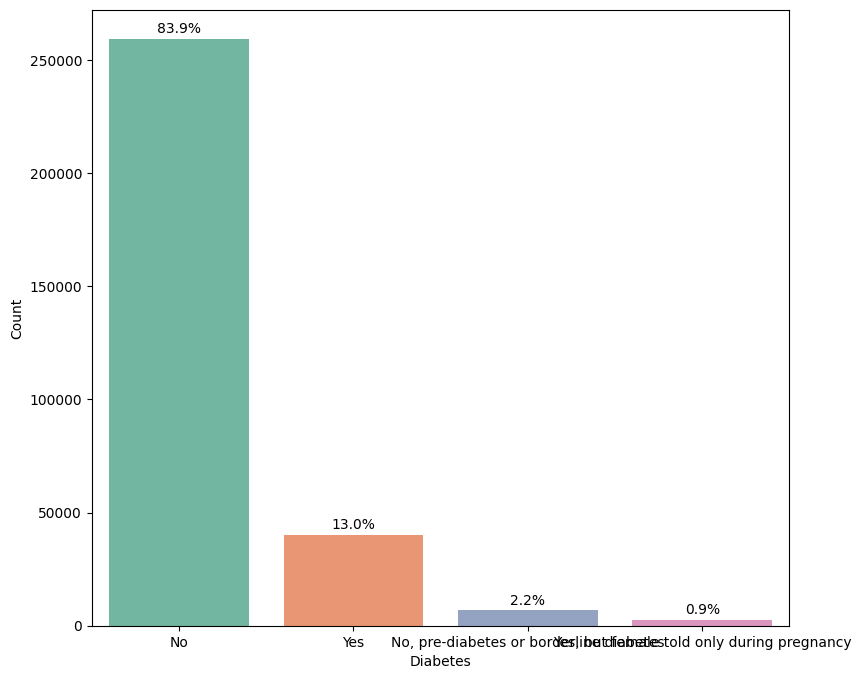

Arthritis


C:\Users\heman\AppData\Local\Temp\ipykernel_12440\3674759050.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = i,


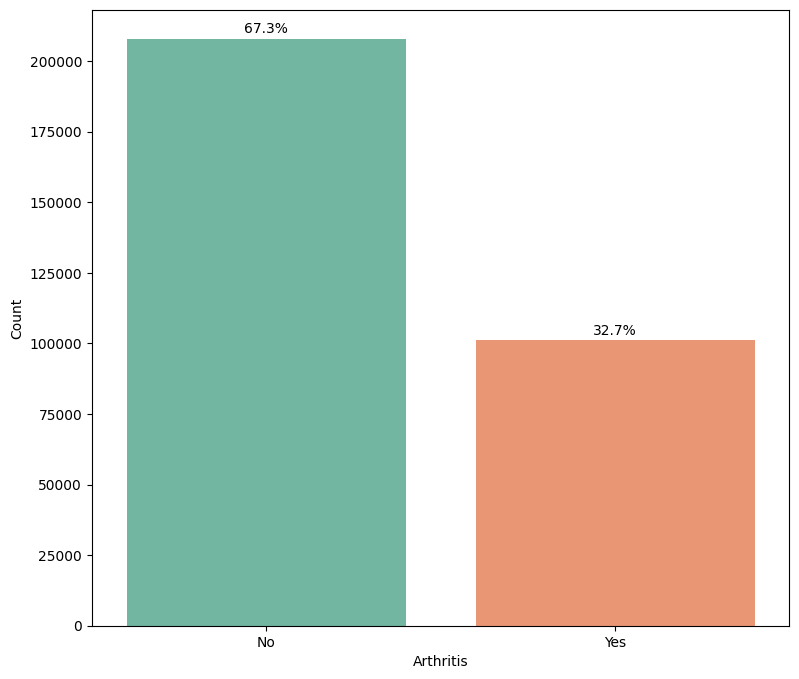

Sex


C:\Users\heman\AppData\Local\Temp\ipykernel_12440\3674759050.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = i,


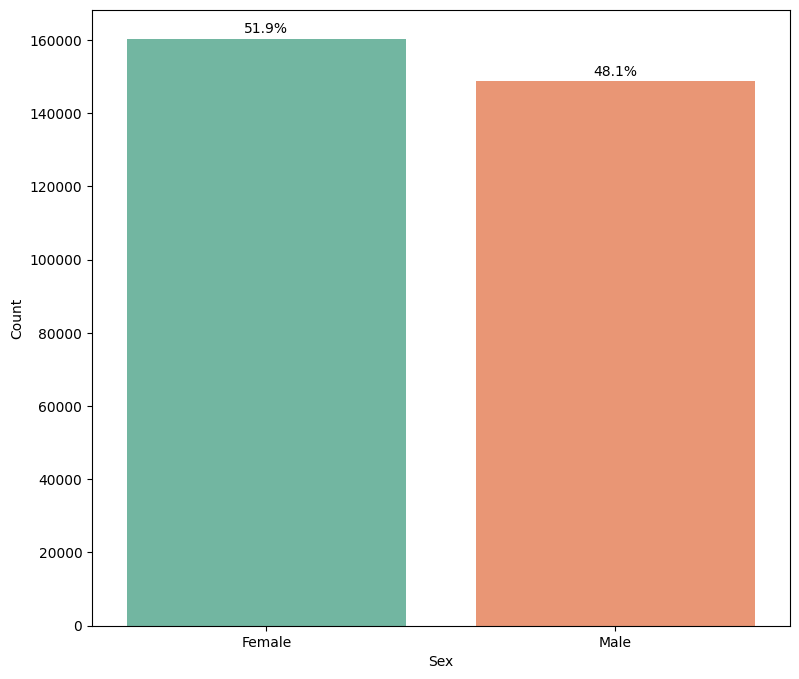

Age_Category


C:\Users\heman\AppData\Local\Temp\ipykernel_12440\3674759050.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = i,


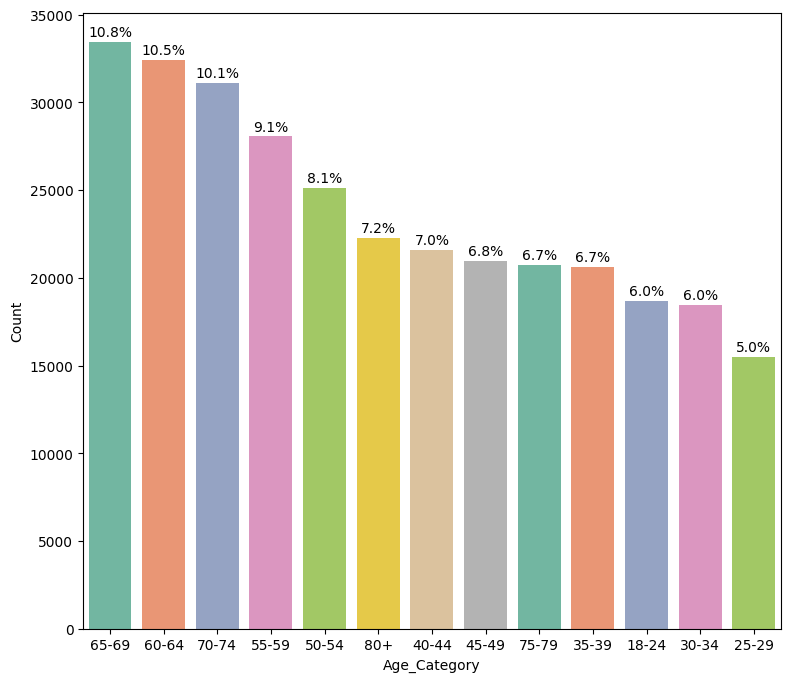

Height_(cm)


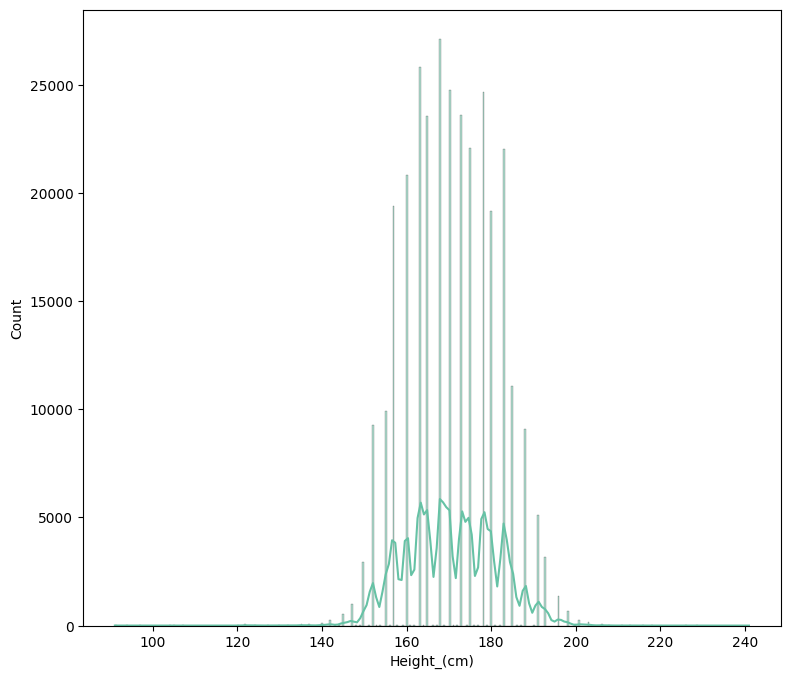

Weight_(kg)


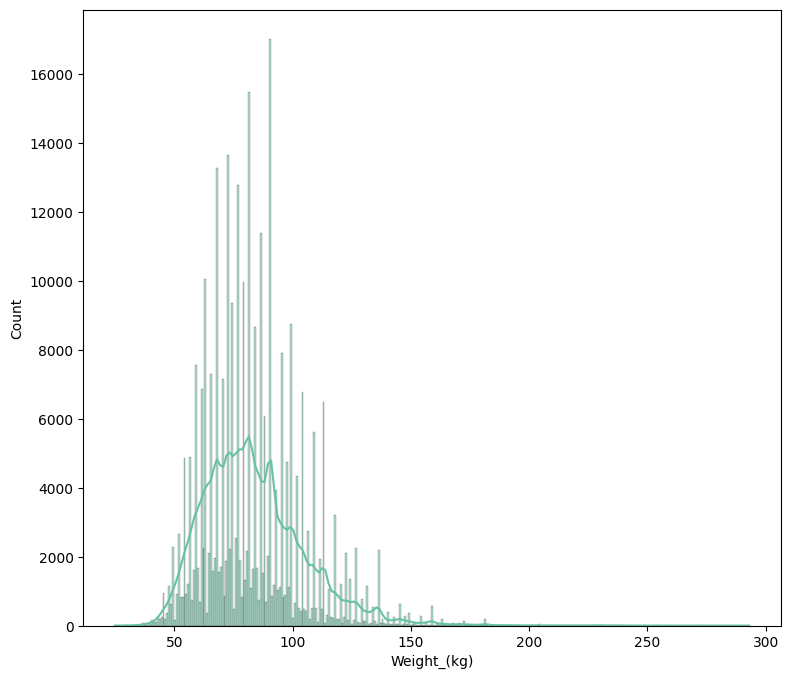

BMI


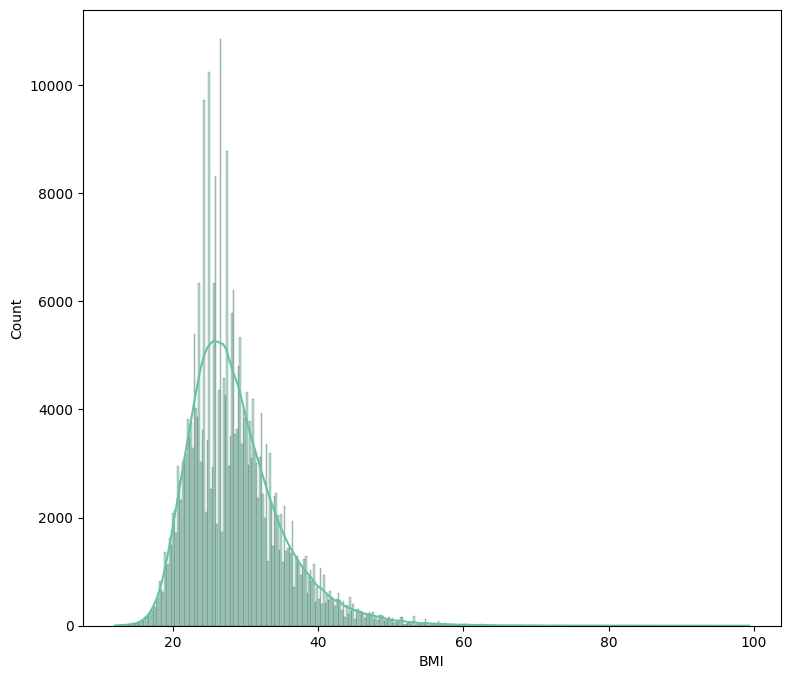

Smoking_History


C:\Users\heman\AppData\Local\Temp\ipykernel_12440\3674759050.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.countplot(x = i,


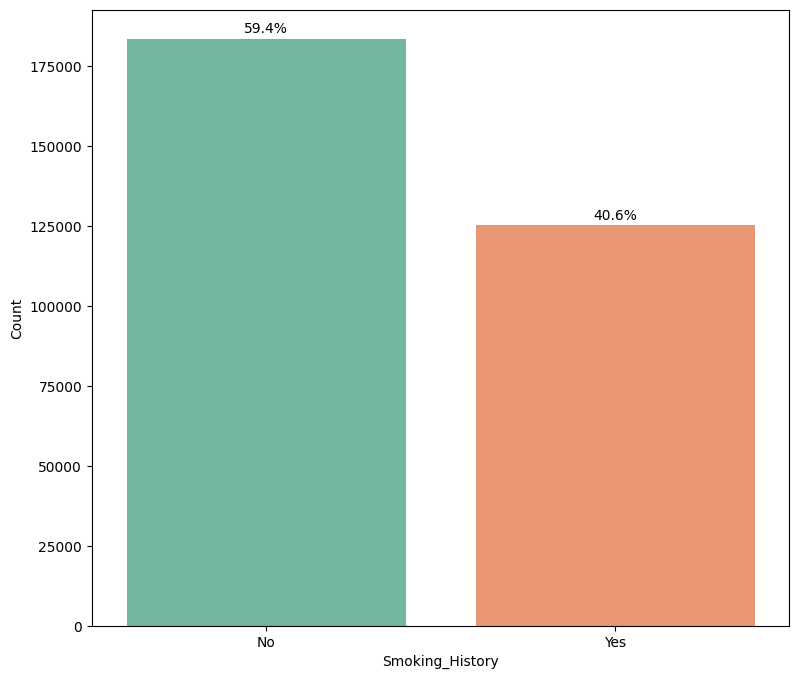

Alcohol_Consumption


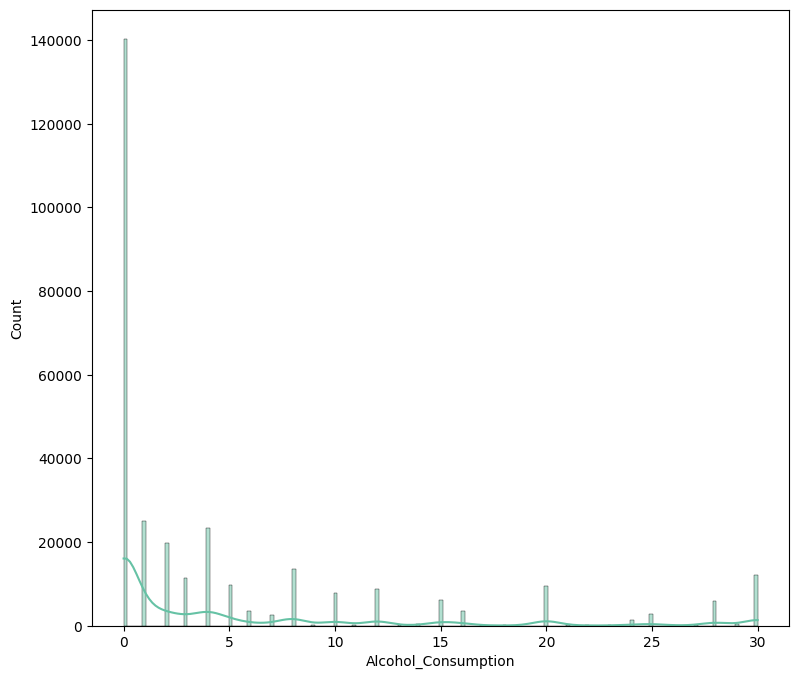

Fruit_Consumption


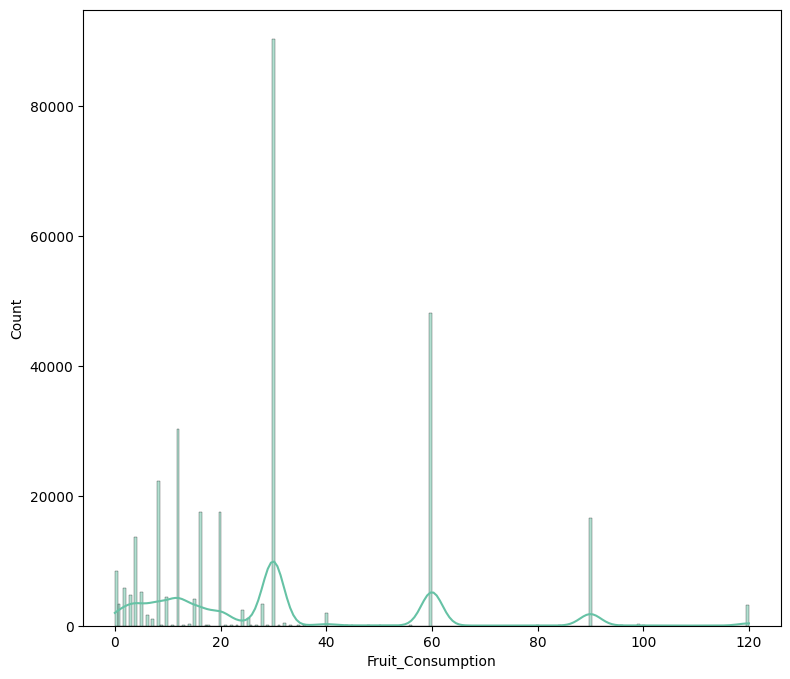

Green_Vegetables_Consumption


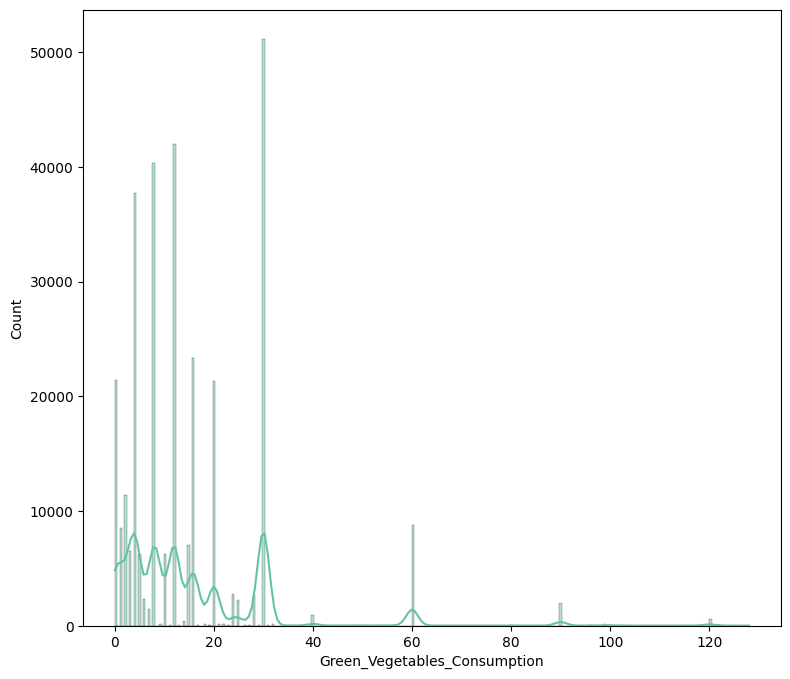

FriedPotato_Consumption


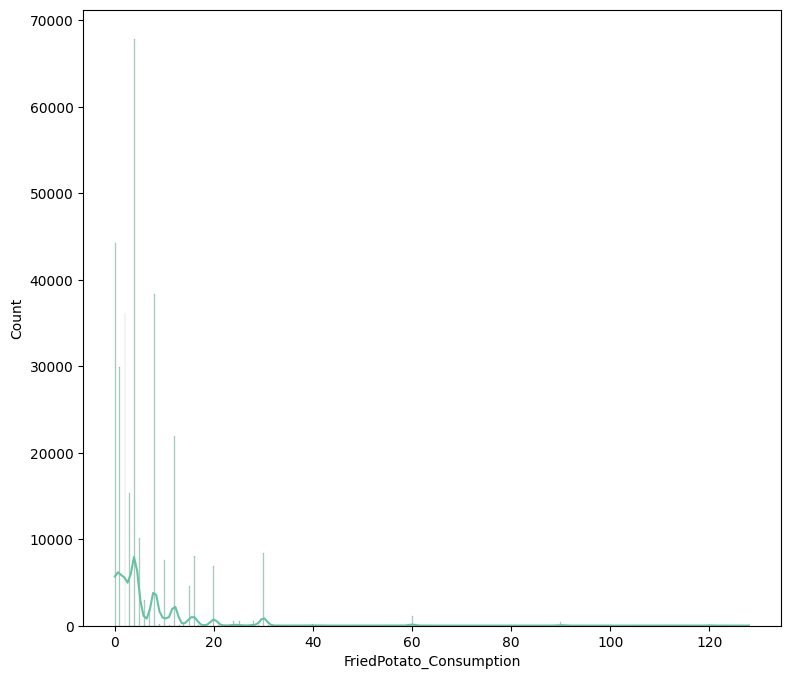

In [8]:
for i in df.columns:
    
    if i == target:
        continue

    if i in categorical:
        if df[i].nunique() > 15:
            print(f'column {i} has many unique values n = {df[i].nunique()} and will not be plotted')
            print('=======================================================')
            continue
        else:
            print(f'{i}')
            fig,ax = plt.subplots(figsize = (9,8))
            color = 'Set2'
            palette_color = sns.color_palette(color)
            ax = sns.countplot(x = i, 
                data=df,
                palette=color,
                order = df[i].value_counts().index
                )
            ax.set_ylabel('Count')

            patches = ax.patches

            for j in range(len(patches)):
                # list_unq_val = list(df[i].unique())

                # cleaned = [x for x in list_unq_val if str(x) != 'nan']
                offset = df[i].value_counts().max() * 0.01
                percentage = list(df[i].value_counts())[j]/df[i].value_counts().sum()
                x = patches[j].get_x() + patches[j].get_width()/2
                y = patches[j].get_height()+ offset
                ax.annotate('{:.1f}%'.format(percentage*100), (x, y), ha='center')
                
            plt.show()
            print('=======================================================')
    
    elif i in numerical:
        print(f'{i}')
        fig,ax = plt.subplots(figsize = (9,8))
        color = 'Set2'
        palette_color = sns.color_palette(color)
        ax = sns.histplot(x = i, 
                data=df,
                # bins = 'auto',
                # bins = 50,
                kde = True,
                color=palette_color[0],
                )
        ax.set_ylabel('Count')
        plt.show()
        print('=======================================================')




### Bivariate Analysis for Classification

#### Categorical

Age_Category vs. Heart_Disease


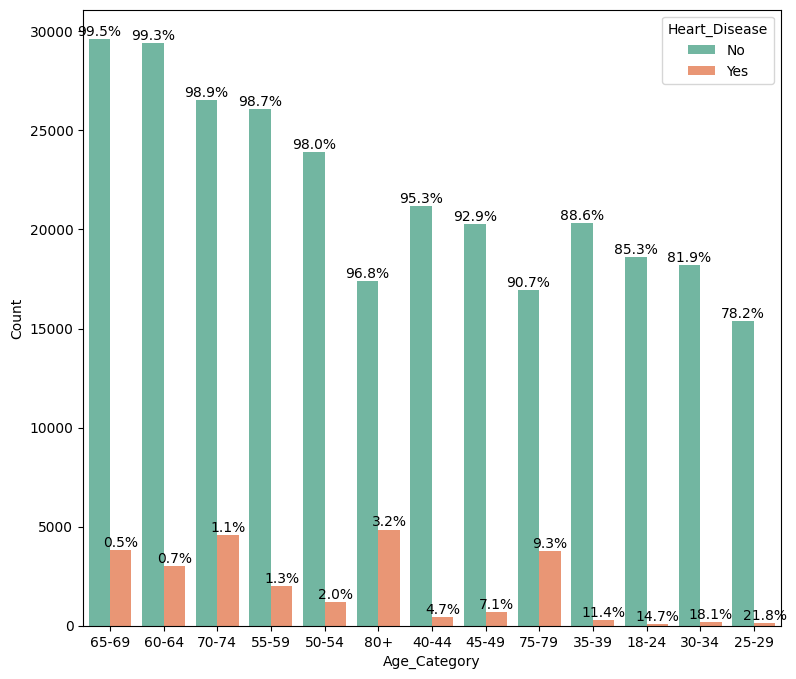

Arthritis vs. Heart_Disease


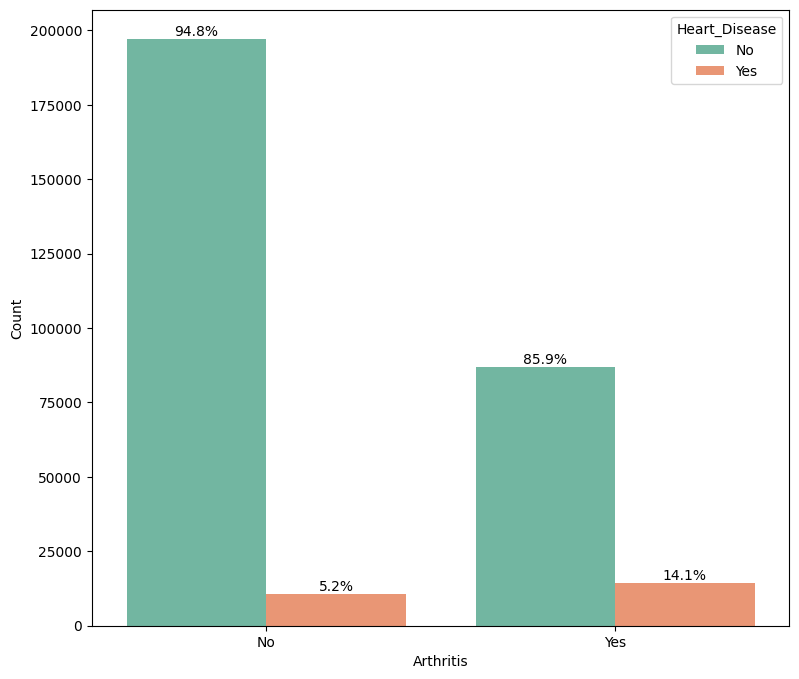

Checkup vs. Heart_Disease


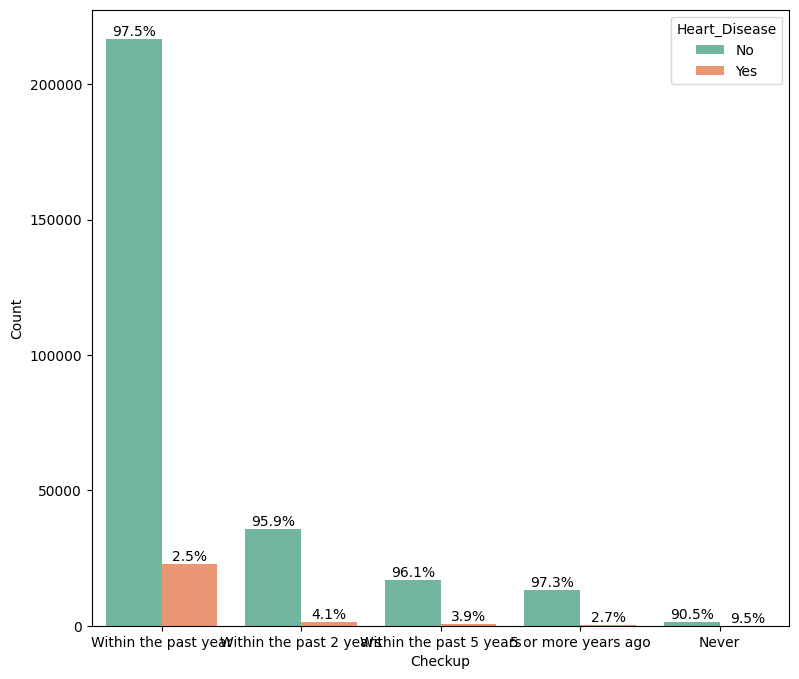

Depression vs. Heart_Disease


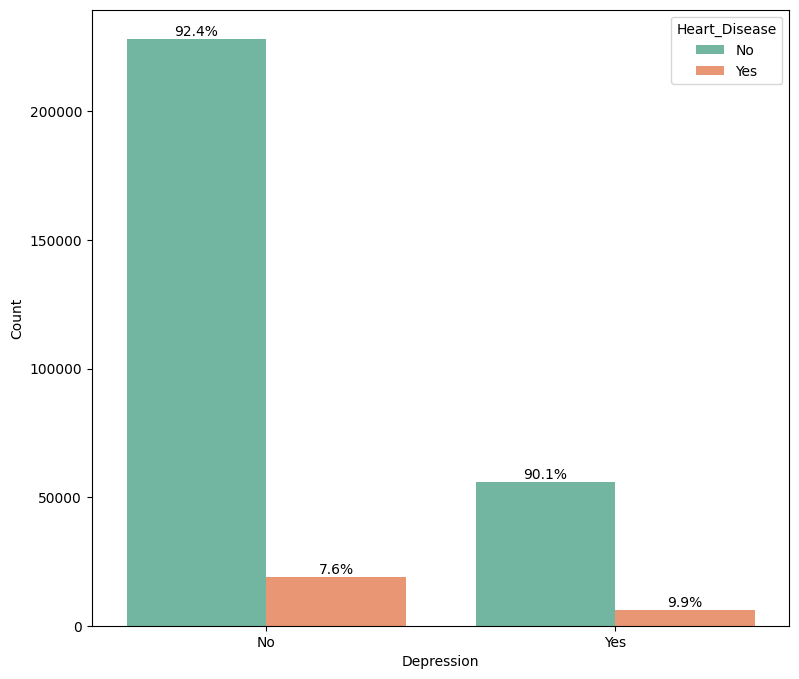

Diabetes vs. Heart_Disease


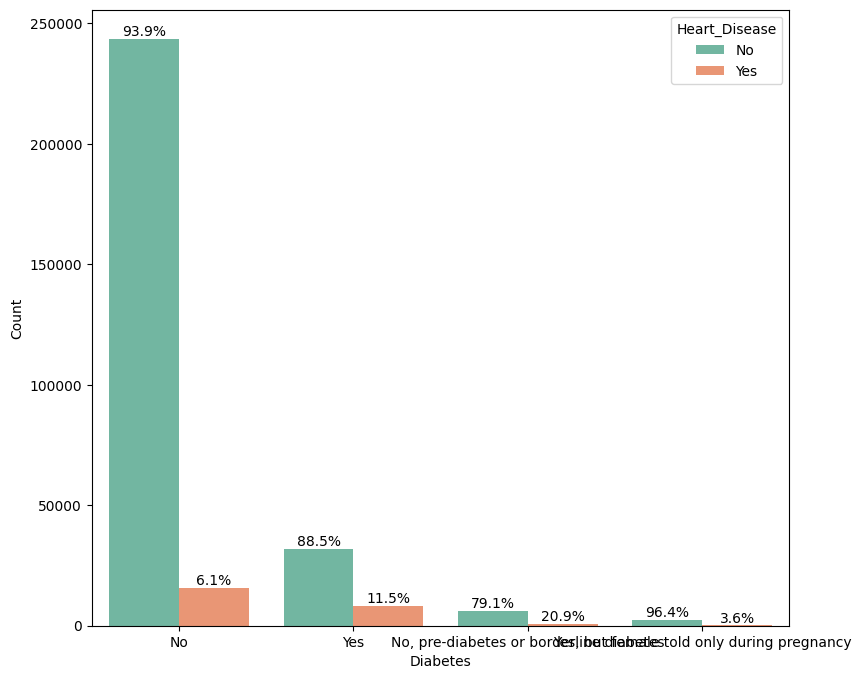

Exercise vs. Heart_Disease


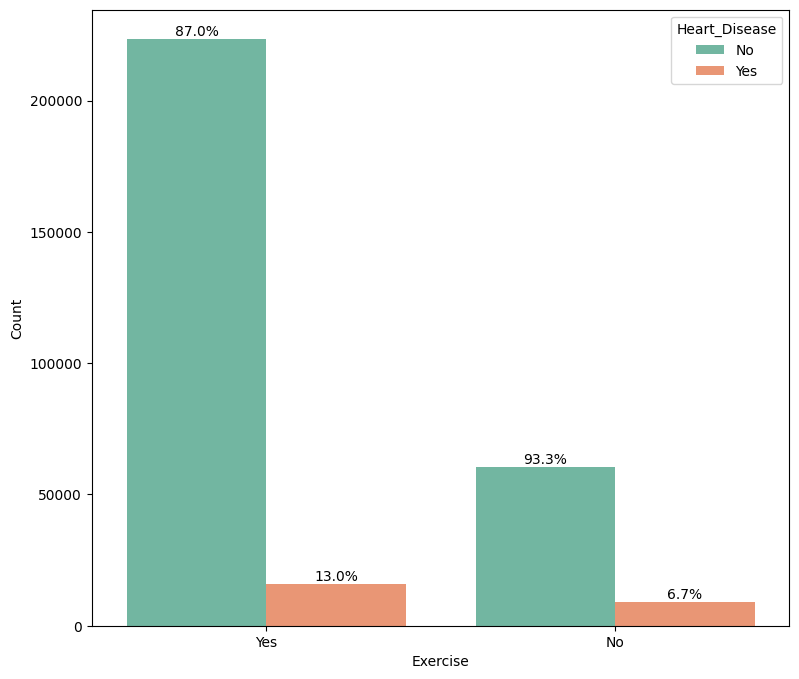

General_Health vs. Heart_Disease


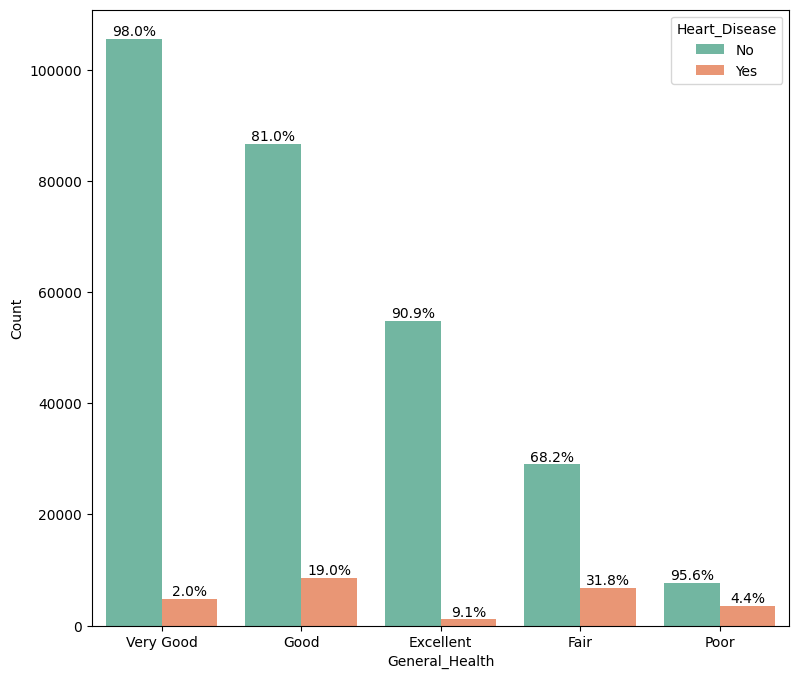

Other_Cancer vs. Heart_Disease


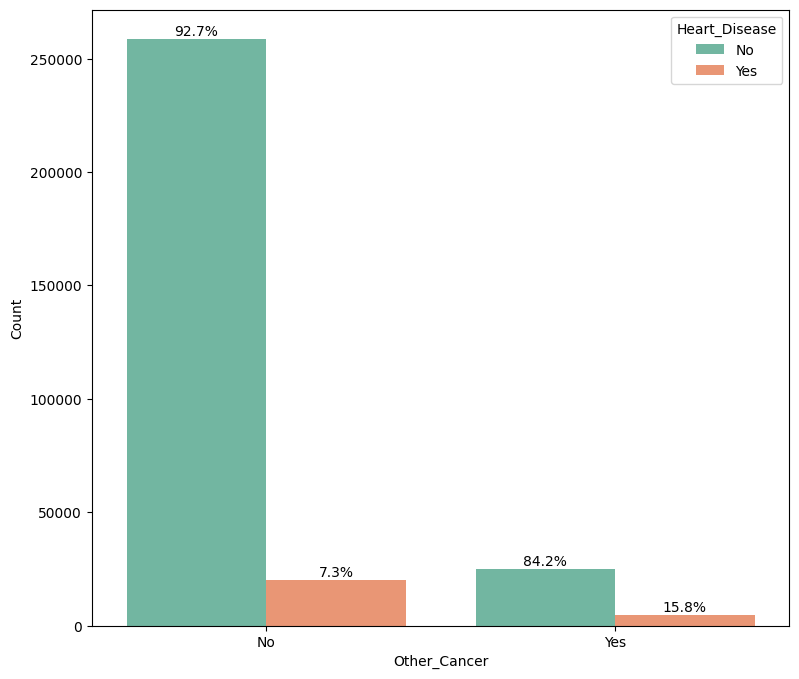

Sex vs. Heart_Disease


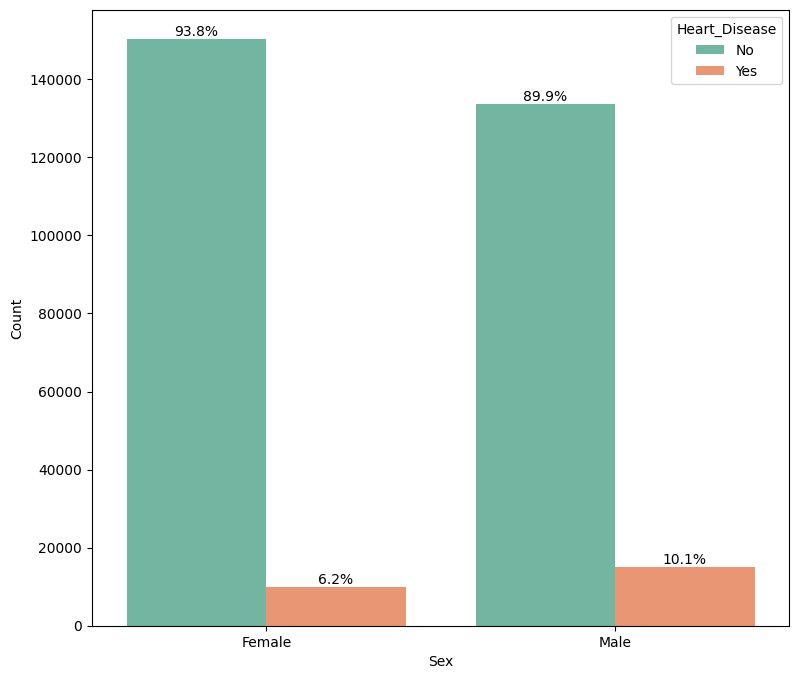

Skin_Cancer vs. Heart_Disease


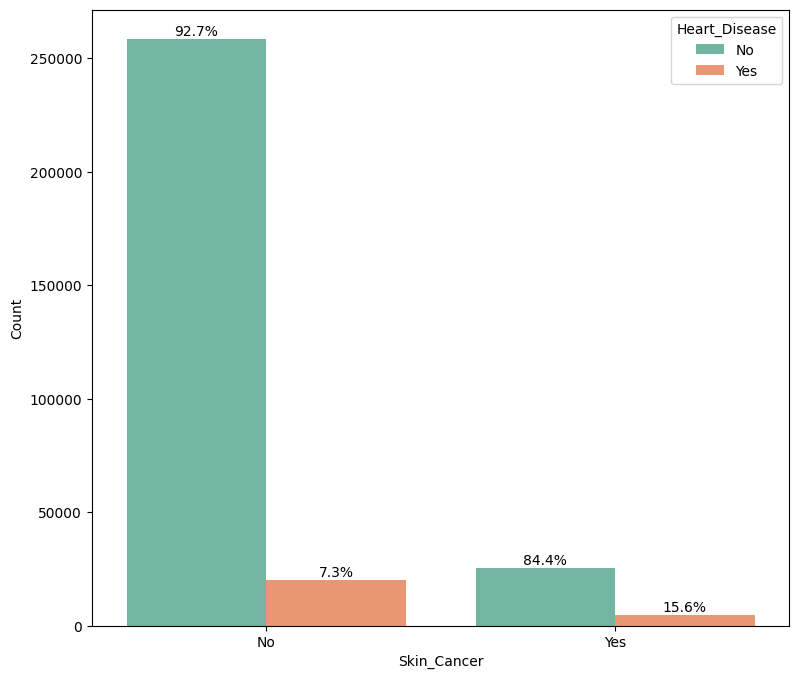

Smoking_History vs. Heart_Disease


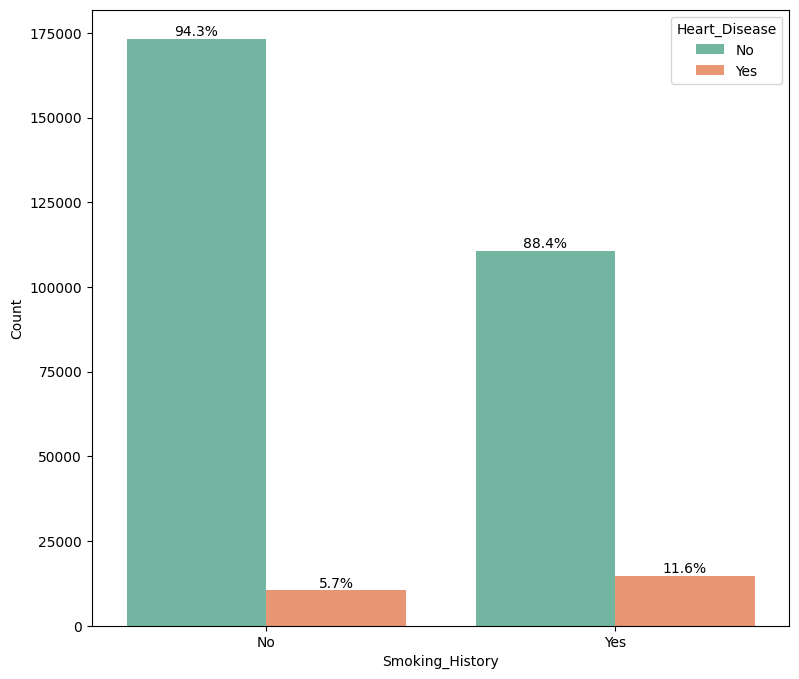

In [9]:
for i in categorical:
        if i == target:
            continue

        if df[i].nunique() > 15:
            print(f'column {i} has many unique values n = {df[i].nunique()} and will not be plotted')
            print('=======================================================')
            continue

        if i in df.columns:
            print(f'{i} vs. {target}')
            eda_bivariate_categorical(df,i,target)
            print('=======================================================')

#### Numerical

Alcohol_Consumption vs. Heart_Disease


C:\Users\heman\AppData\Local\Temp\ipykernel_12440\1041135933.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = data,x=data[column],y = target, ax=axes[j], palette=color,orient='h',


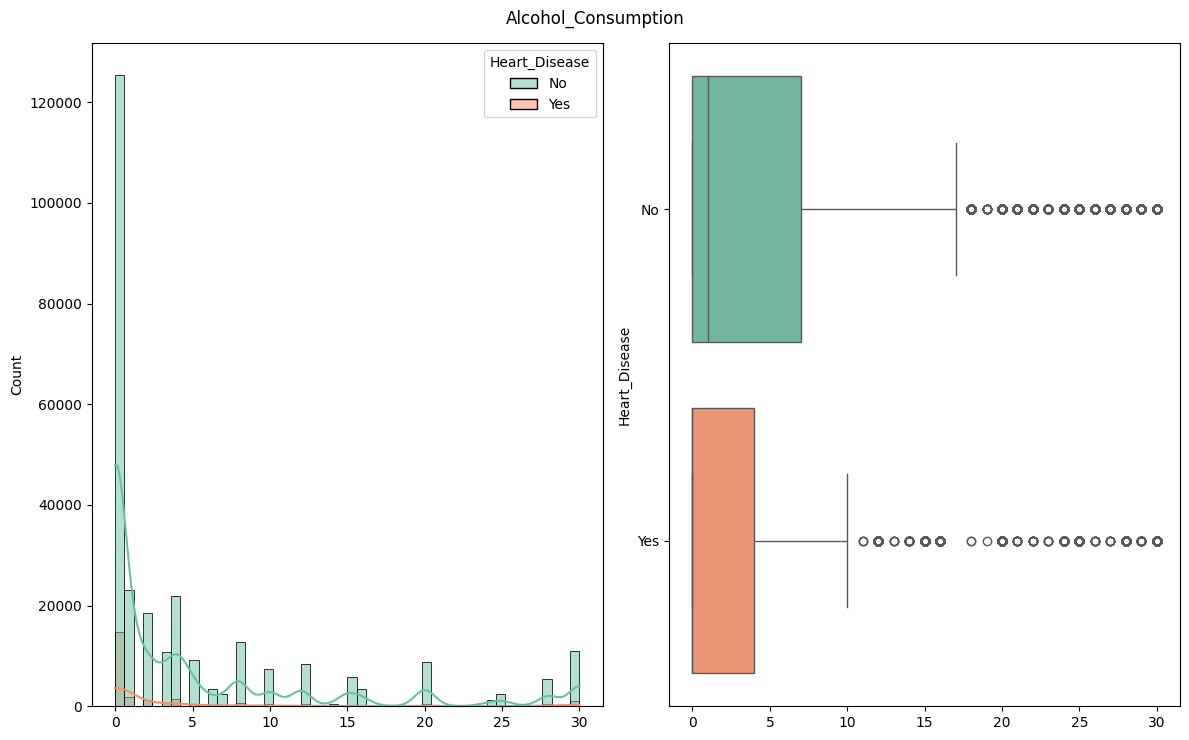

BMI vs. Heart_Disease


C:\Users\heman\AppData\Local\Temp\ipykernel_12440\1041135933.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = data,x=data[column],y = target, ax=axes[j], palette=color,orient='h',


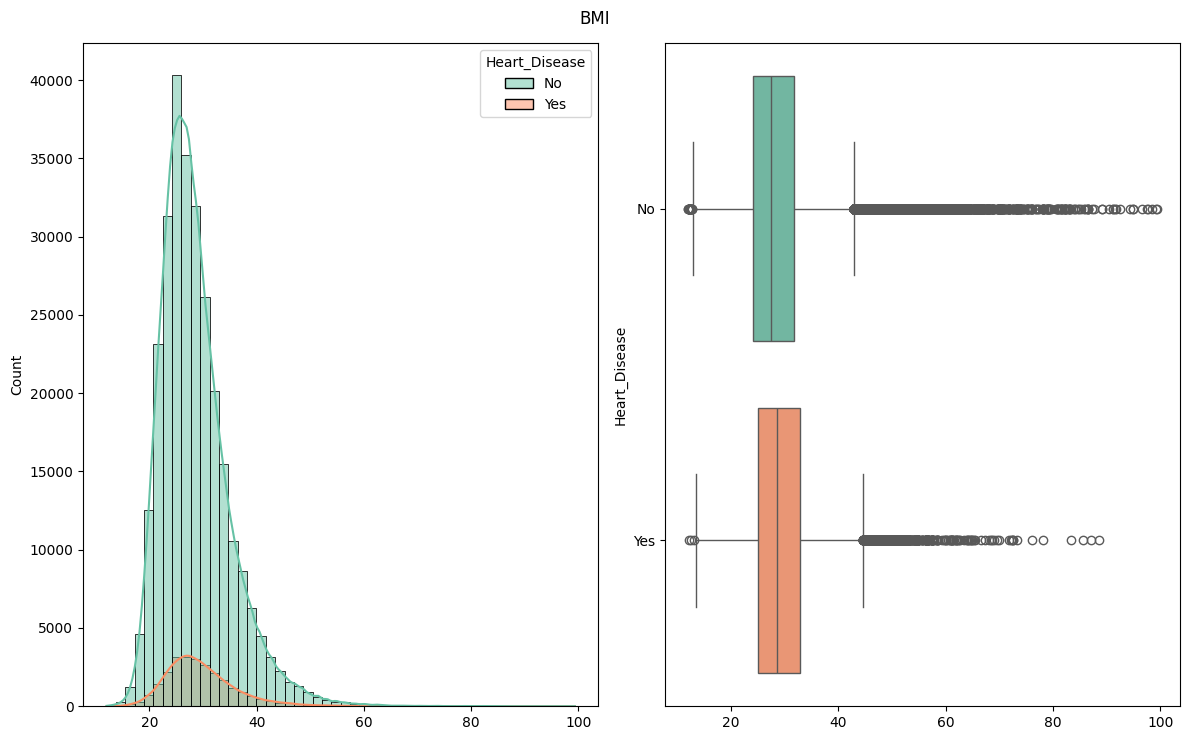

FriedPotato_Consumption vs. Heart_Disease


C:\Users\heman\AppData\Local\Temp\ipykernel_12440\1041135933.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = data,x=data[column],y = target, ax=axes[j], palette=color,orient='h',


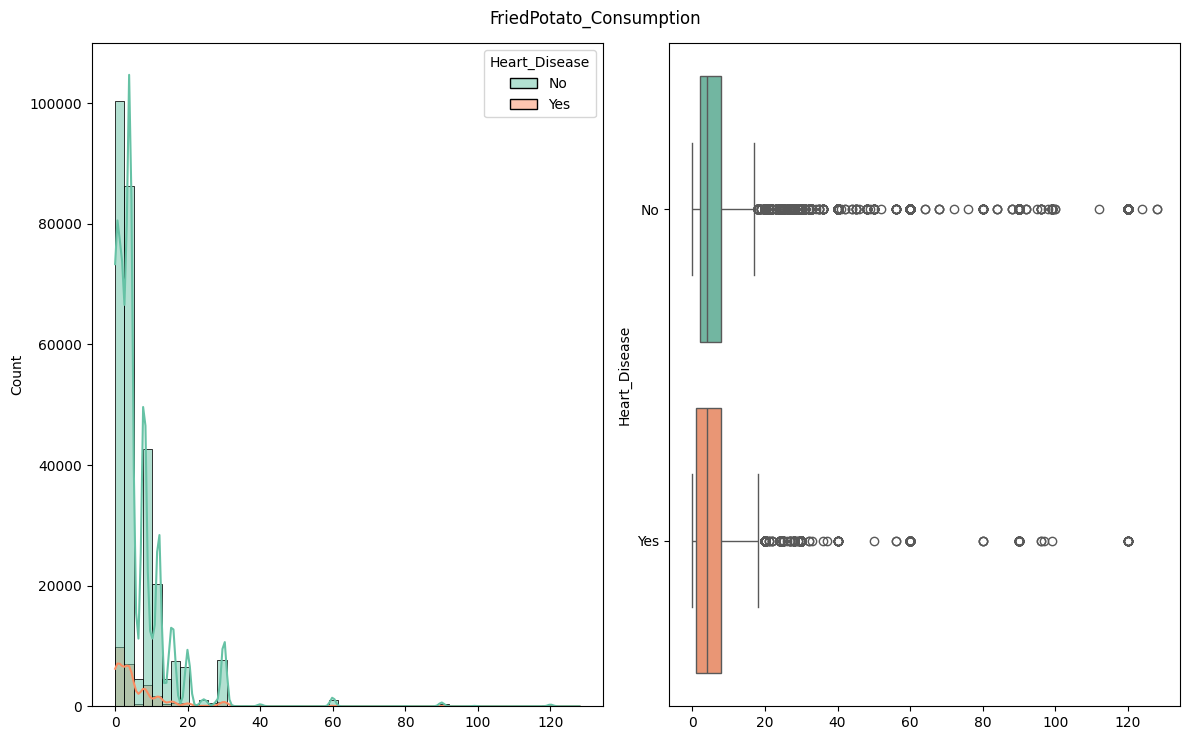

Fruit_Consumption vs. Heart_Disease


C:\Users\heman\AppData\Local\Temp\ipykernel_12440\1041135933.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = data,x=data[column],y = target, ax=axes[j], palette=color,orient='h',


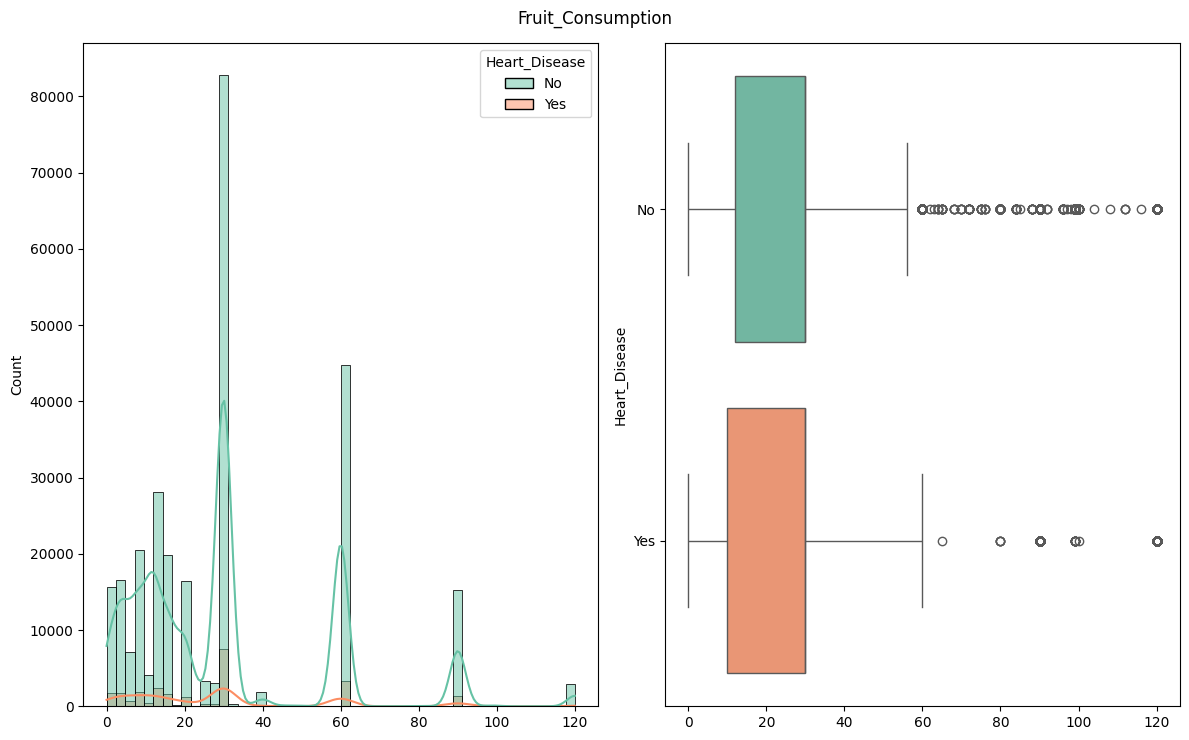

Green_Vegetables_Consumption vs. Heart_Disease


C:\Users\heman\AppData\Local\Temp\ipykernel_12440\1041135933.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = data,x=data[column],y = target, ax=axes[j], palette=color,orient='h',


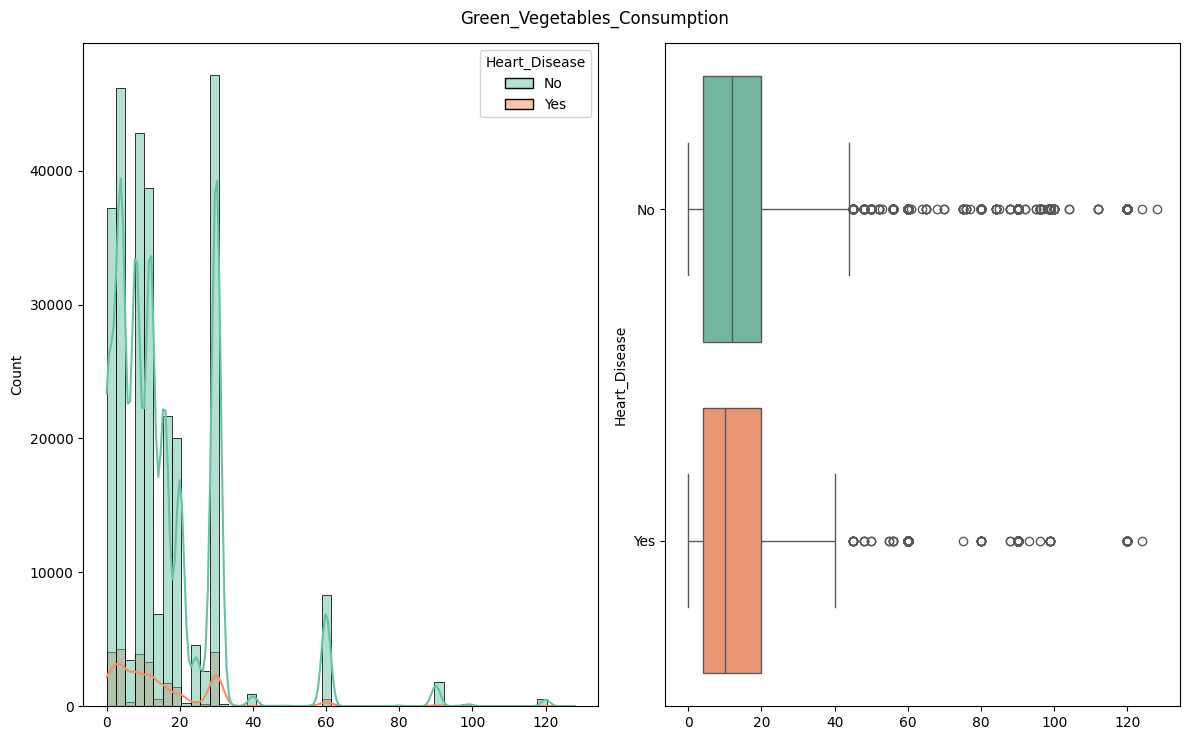

Height_(cm) vs. Heart_Disease


C:\Users\heman\AppData\Local\Temp\ipykernel_12440\1041135933.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = data,x=data[column],y = target, ax=axes[j], palette=color,orient='h',


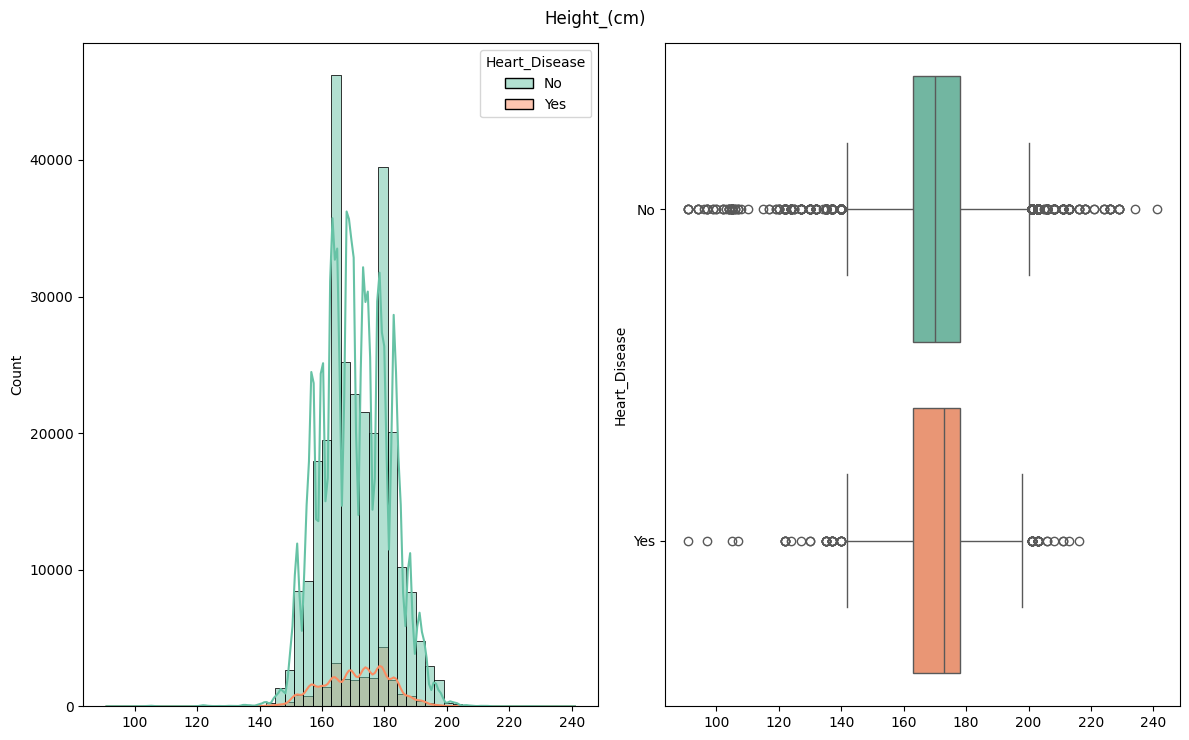

Weight_(kg) vs. Heart_Disease


C:\Users\heman\AppData\Local\Temp\ipykernel_12440\1041135933.py:66: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data = data,x=data[column],y = target, ax=axes[j], palette=color,orient='h',


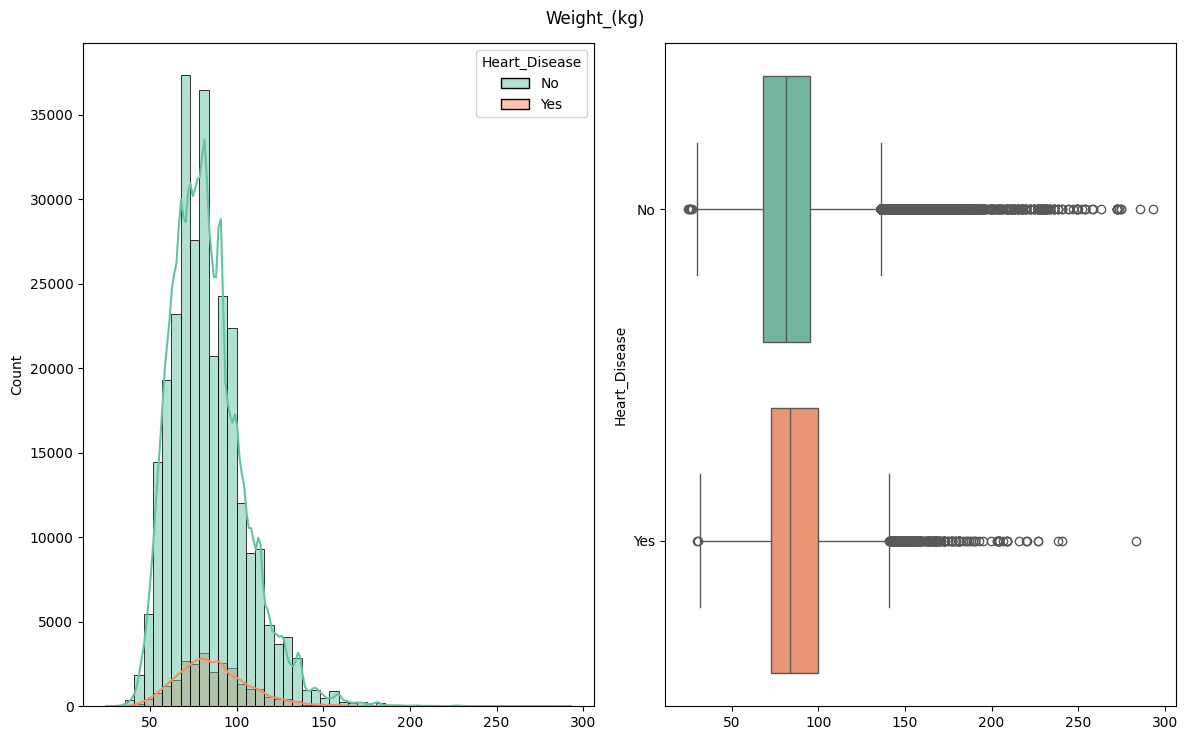

In [10]:
for i in numerical:
        if i == target:
            continue

        if i in df.columns:
            print(f'{i} vs. {target}')
            eda_bivariate_numerical(
                    data = df,
                    column = i,
                    target = target,
                    color = 'Set2',
                    figsize=(12,7.5),
                    val=0)
            print('=======================================================')

### Multivariate Analysis

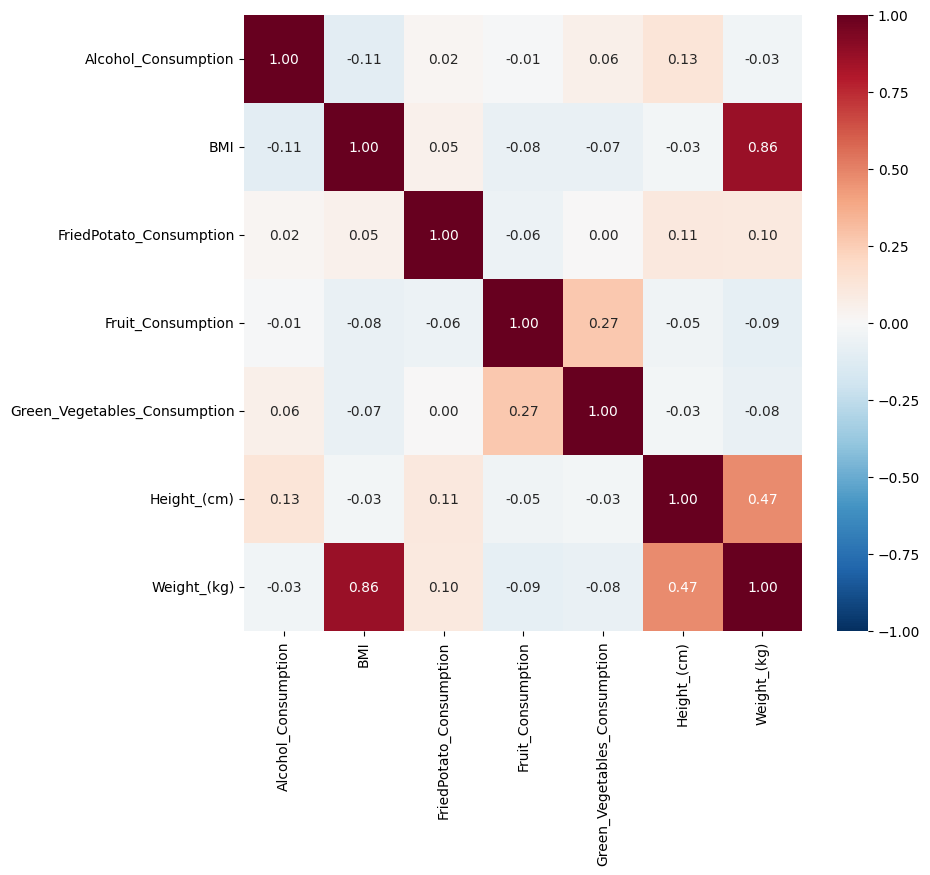

In [11]:
## Plotting the correlation matrix
correlation_matrix = df[numerical].corr()
plt.figure(figsize=(9,8))

## use mask to cover the upper diagonal in the matrix
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

sns.heatmap(correlation_matrix,
            cmap='RdBu_r',
            # cmap='RdYlGn',
            annot=True,
            # Masking the diagonal
            # mask=mask,
            fmt='.2f',
            vmin=-1, vmax=1)

## Saving the figure
# plt.savefig("latex2.pdf")

plt.show()

## Preprocessing 

Changing the values of Heart Disease to 0 and 1 for preprocessing steps

In [12]:

df['Heart_Disease'] = df['Heart_Disease'].map({'No':0,'Yes':1})
print('')
print(df['Heart_Disease'].value_counts())


Heart_Disease
0    283883
1     24971
Name: count, dtype: int64


Splitting the train and test set. Using stratify to keep the ratio between two classes be the same

In [13]:
from sklearn.model_selection import train_test_split

train,test = train_test_split(df, test_size=0.2,random_state=22,stratify=df['Heart_Disease'])

print(train.shape)
print(test.shape)

(247083, 19)
(61771, 19)


Showing the ratio of the target variable from train and test set

In [14]:
yes = train['Heart_Disease'].value_counts()[0]/len(train['Heart_Disease'])*100
no = train['Heart_Disease'].value_counts()[1]/len(train['Heart_Disease'])*100
print('Train Set')
print(f'ratio of people with heart disease to total is {yes}')
print(f'ratio of people that dont have heart disease to total is {no}')
print('')

yes = test['Heart_Disease'].value_counts()[0]/len(test['Heart_Disease'])*100
no = test['Heart_Disease'].value_counts()[1]/len(test['Heart_Disease'])*100
print('Test Set')
print(f'ratio of people with heart disease to total is {yes}')
print(f'ratio of people that dont have heart disease to total is {no}')

Train Set
ratio of people with heart disease to total is 91.91486261701533
ratio of people that dont have heart disease to total is 8.085137382984666

Test Set
ratio of people with heart disease to total is 91.91530005989866
ratio of people that dont have heart disease to total is 8.084699940101341


In [15]:
## Splitting the X and y variables in the train set
X_train = train.drop("Heart_Disease", axis=1)
y_train = train["Heart_Disease"].copy()

## Splitting the X and y variables in the test set
X_test = test.drop("Heart_Disease", axis=1)
y_test = test["Heart_Disease"].copy()

Printing the number of unique values per each column

In [16]:
X_train.nunique()

General_Health                     5
Checkup                            5
Exercise                           2
Skin_Cancer                        2
Other_Cancer                       2
Depression                         2
Diabetes                           4
Arthritis                          2
Sex                                2
Age_Category                      13
Height_(cm)                       98
Weight_(kg)                      502
BMI                             3502
Smoking_History                    2
Alcohol_Consumption               31
Fruit_Consumption                 73
Green_Vegetables_Consumption      73
FriedPotato_Consumption           67
dtype: int64

Notes:

- There are 8 categorical variables. Variables that are not in order
- There are 7 numerical variables.
- There are 3 ordinal variables. The General Health, Age Category, and the Checkup variable. The data from this can be represented with an order.


### Creating Pipelines

#### Categorical Pipeline

In [17]:
cat_pipeline = make_pipeline(OneHotEncoder(handle_unknown='ignore',drop='first'))

- For categorical pipeline, only OneHotEncoder will be implemented. Since this data set has been cleaned and there are no missing values

#### Numerical Pipeline

In [18]:
num_pipeline = make_pipeline(
                             FunctionTransformer(np.log1p,feature_names_out='one-to-one'),
                             StandardScaler()
                            )   

For numerical pipeline, two methods are used:

1. Log Transform: From the EDA, most of the numerical functions are skewed right. Taking the log(x+1) of the variable will help fix the distribution
2. Standard Scaler: The numerical variables will be scaled to put them all on the same scale

#### Ordinal Pipelines

In [19]:
## Age Category Pipeline
agecat_pipeline = make_pipeline(
        OrdinalEncoder()
)

## General Health Pipeline
genhealth_pipeline = make_pipeline(
        OrdinalEncoder(categories=[['Poor','Fair','Good','Very Good','Excellent']])
)

## Checkup Pipeline
checkup_pipeline = make_pipeline(
        OrdinalEncoder(categories=[['Within the past year','Within the past 2 years','Within the past 5 years','5 or more years ago','Never']])
)

- For ordinal variables, the variables are transformed based on their order. The values with in the lowest order will start with 0 and increases by 1.

#### Creating the pipeline lists

In [20]:
## Setting each column to the pipeline where they will be used
num_pipe_col = numerical

cat_pipe_col = ['Arthritis', 'Depression', 'Diabetes',
       'Exercise', 'Other_Cancer', 'Sex',
       'Skin_Cancer', 'Smoking_History']

#### Finalizing the preprocessing pipeline

In [21]:
## Combining all the pipelines and creating a main pipeline to enter all the data
preprocessing = ColumnTransformer([
    ('Categorical', cat_pipeline,   cat_pipe_col),
    ('Age_Category',agecat_pipeline,['Age_Category']),
    ('Checkup',checkup_pipeline,['Checkup']),
    ('Gen_health',genhealth_pipeline,['General_Health']),
    ('Numerical',   num_pipeline,  num_pipe_col),
],remainder='passthrough')
preprocessing

ColumnTransformer(remainder='passthrough',
                  transformers=[('Categorical',
                                 Pipeline(steps=[('onehotencoder',
                                                  OneHotEncoder(drop='first',
                                                                handle_unknown='ignore'))]),
                                 ['Arthritis', 'Depression', 'Diabetes',
                                  'Exercise', 'Other_Cancer', 'Sex',
                                  'Skin_Cancer', 'Smoking_History']),
                                ('Age_Category',
                                 Pipeline(steps=[('ordinalencoder',
                                                  OrdinalEncoder())]),
                                 ['Age_Category']),...
                                                                              'Excellent']]))]),
                                 ['General_Health']),
                                ('Numerical',
                                 Pipeline(steps=[('functiontransformer',
                                                  FunctionTransformer(feature_names_out='one-to-one',
                                                                      func=<ufunc 'log1p'>)),
                                                 ('standardscaler',
                                                  StandardScaler())]),
                                 Index(['Alcohol_Consumption', 'BMI', 'FriedPotato_Consumption',
       'Fruit_Consumption', 'Green_Vegetables_Consumption', 'Height_(cm)',
       'Weight_(kg)'],
      dtype='object'))])

In [22]:
## Using preprocessing pipeline
print('Shape before the preprocessing:')
print(X_train.shape)

train_preprocessed = preprocessing.fit_transform(X_train)

print('Shape after the preprocessing:')
print(train_preprocessed.shape)

Shape before the preprocessing:
(247083, 18)
Shape after the preprocessing:
(247083, 20)


## Model Training

Creating a stratified Kfold for cross validating the test set in different machine learning models

In [23]:
from sklearn.model_selection import StratifiedKFold

kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=22)

Specifying the model names

In [24]:
models = {
    'Logistic_Regression':LogisticRegression(max_iter=10000,random_state=22),
    'Decision Tree':DecisionTreeClassifier(random_state=22),
    'Random_Forest':RandomForestClassifier(n_estimators=100,random_state=22),
    'K-Nearest_Neighbor':KNeighborsClassifier(),
    'GaussianNB':GaussianNB(),
}

scores_dict = {}

report_dict = {}

Trying all the models and getting their cross validation score and showing its classification report.

In [25]:
for model_name,model in models.items():
    model_pipeline = make_pipeline(preprocessing,
                              SMOTE(random_state=22),
                              model  
                                )
    scores = cross_val_score(model_pipeline, 
                            X_train, 
                            y_train, 
                            scoring='f1', 
                            cv=kf,
                            # verbose=1,
                            n_jobs=-1,
                            )
    model_score_mean = np.mean(scores)
    scores_dict[model_name] = model_score_mean
    print('------------------------------------------------------------')
    print(f'The score for {model_name} is {model_score_mean}')

    ## fitting the pipeline for classification report
    model_pipeline.fit(X_train,y_train)

    prediction = model_pipeline.predict(X_train)

    report = classification_report(y_train, prediction, output_dict=True)
    report_dict[model_name] = report
    print('')
    print(f'This is the classification report for {model_name}:')
    report_df = pd.DataFrame(report).T
    print(report_df)
    print('------------------------------------------------------------')
    

------------------------------------------------------------
The score for Logistic_Regression is 0.325662442043685

This is the classification report for Logistic_Regression:
              precision    recall  f1-score        support
0              0.975116  0.731786  0.836107  227106.000000
1              0.205299  0.787706  0.325709   19977.000000
accuracy       0.736307  0.736307  0.736307       0.736307
macro avg      0.590208  0.759746  0.580908  247083.000000
weighted avg   0.912876  0.736307  0.794841  247083.000000
------------------------------------------------------------
------------------------------------------------------------
The score for Decision Tree is 0.22236536988625638

This is the classification report for Decision Tree:
              precision    recall  f1-score        support
0              0.999982  1.000000  0.999991  227106.000000
1              1.000000  0.999800  0.999900   19977.000000
accuracy       0.999984  0.999984  0.999984       0.999984
macro a

- **Note:** The KF fold are used for the cross validation process. The model training is combined already with the cross validation to prevent the bias or the overfitting of the training set.

- **Additional Note:** Included in the pipeline for model training is the SMOTE. SMOTE is used to deal with the imbalances classes. SMOTE is included in the pipeline where, the data only after being cross validated will then be subjected to SMOTE to prevent the data leakage among training and testing sets.

In [26]:
final_model =  models["Random_Forest"]

In [35]:
# CONFUSION MATRIX

model_pipeline = make_pipeline(preprocessing,SMOTE(random_state=22),final_model)
y_pred = model_pipeline.predict(X_train)
cm = confusion_matrix(y_train, y_pred)

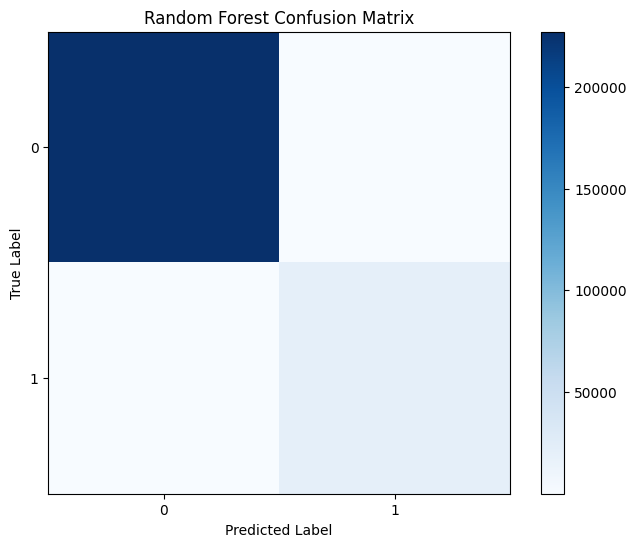

In [28]:
plt.figure(figsize=(8,6))
plt.imshow(cm, cmap='Blues')  # Choose a colormap of your liking
plt.title('Random Forest Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(y_train.unique()))  # Assuming unique target values 
plt.xticks(tick_marks, y_train.unique())
plt.yticks(tick_marks, y_train.unique())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [29]:
import joblib
joblib.dump(final_model, open("final_model", 'wb'))